# Task 2

1. Write Python code that allows you to regularly sample a given triangle with a variable number of points. Apply it to the triangle whose vertices are the sRGB primaries (1, 0, 0), (0, 1, 0), (0, 0, 1) to generate around 100 different colors that fall on that triangle.

In [2]:
import numpy as np

def sample_triangle(n):
    #P=(1−a−−√)v1+(a−−√(1−b))v2+(ba−−√)v3

    linsp = (np.linspace(0, 1, int(np.sqrt(n))))

    # 2d arange
    a, b = np.meshgrid(
        linsp,
        linsp
    )
    a = a.flatten()
    b = b.flatten()
    
    # a = np.arange(0, 1, 1/n)
    # b = np.arange(0, 1, 1/n)


#     a = np.random.uniform(0, 1, n)
#     b = np.random.uniform(0, 1, n)

    x = 1 - np.sqrt(a)
    y = np.sqrt(a) * (1 - b)
    z = np.sqrt(a) * b

    return np.array([x, y, z]).T

print(
    'Sampled points:\n',
    sample_triangle(10)
)

Sampled points:
 [[1.         0.         0.        ]
 [0.29289322 0.70710678 0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.29289322 0.35355339 0.35355339]
 [0.         0.5        0.5       ]
 [1.         0.         0.        ]
 [0.29289322 0.         0.70710678]
 [0.         0.         1.        ]]


2.  Create a 3D scatterplot of your points in sRGB color space in which each point is represented by
a marker in the corresponding color, as in Figure 2. Properly label the axes and set a reasonable
2D projection of the 3D plot

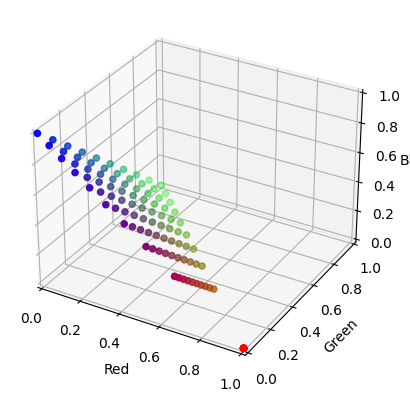

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# make plot interactive
# %matplotlib notebook

# Create a 3D scatterplot, zeros start at one point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

points = sample_triangle(100)

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points)

# Set limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# Set labels
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show()

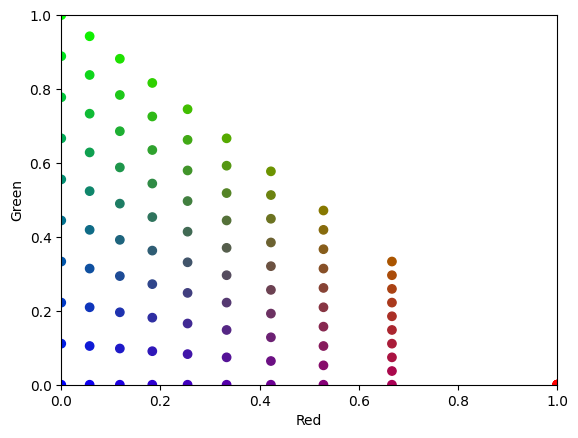

In [4]:
# project the points on the xy plane
fig = plt.figure()
ax = fig.add_subplot(111)

points = sample_triangle(100)

# Plot the points
ax.scatter(points[:, 0], points[:, 1], c=points)

# Set limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Set labels
ax.set_xlabel('Red')
ax.set_ylabel('Green')

plt.show()

Comment: the points are not uniformly distributed, because I did not find a proper way to sample the a and b values. I tried to use np.arange, but it did not work out. I ended up using np.linspace, which is not uniform, but it is the best I could do.

3. Convert the colors to the CIE XYZ and CIE Lab color spaces. Again create suitable 3D scatterplots and label the axes / adjust the views. Based on the visualization, comment on which sRGB
primary is brightest, which is darkest.

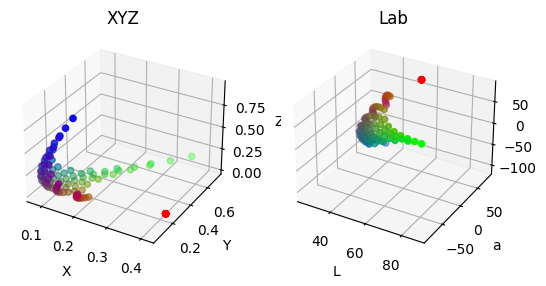

In [7]:
import skimage.color as color

# convert to XYZ
xyz = color.rgb2xyz(points)

# convert to Lab
lab = color.rgb2lab(points)

# Create a 3D scatterplot, zeros start at one point
# fig = plt.figure()
fig, ax = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

# Plot the points
ax[0].scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=points)

# Set labels
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_zlabel('Z')
ax[0].set_title('XYZ')

ax[1].scatter(lab[:, 0], lab[:, 1], lab[:, 2], c=points)

# Set labels
ax[1].set_xlabel('L')
ax[1].set_ylabel('a')
ax[1].set_zlabel('b')
ax[1].set_title('Lab')

plt.show()

4. For each of the three color spaces (sRGB, XYZ, Lab), use Multidimensional Scaling (e.g., from
sklearn) to create 2D embeddings of your points. Briefly comment on the resulting shapes.

c:\users\алексей\documents\code\machine_learning_project\venv\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\users\алексей\documents\code\machine_learning_project\venv\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\users\алексей\documents\code\machine_learning_project\venv\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


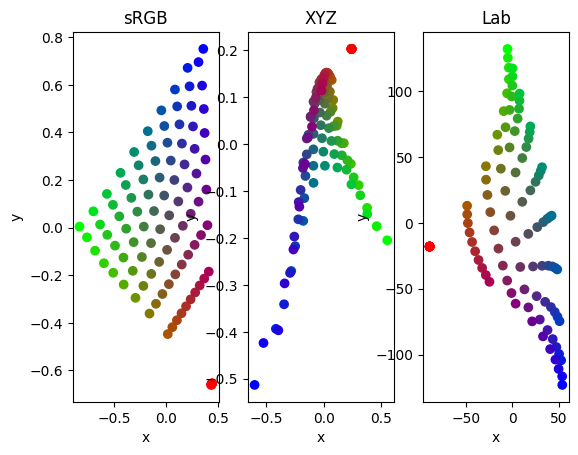

In [8]:
from sklearn.manifold import MDS

# MDS
mds = MDS(n_components=2)

# sRGB
srgb_mds = mds.fit_transform(points)

# XYZ
xyz_mds = mds.fit_transform(xyz)

# Lab
lab_mds = mds.fit_transform(lab)

# Create a 3D scatterplot, zeros start at one point
fig, ax = plt.subplots(1, 3)

# Plot the points
ax[0].scatter(srgb_mds[:, 0], srgb_mds[:, 1], c=points)

# Set labels
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('sRGB')

ax[1].scatter(xyz_mds[:, 0], xyz_mds[:, 1], c=points)

# Set labels
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('XYZ')

ax[2].scatter(lab_mds[:, 0], lab_mds[:, 1], c=points)

# Set labels
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_title('Lab')

plt.show()

Comment: my shapes do not look exactly like the ones in the slides, but they are similar. This is because I did not figure out a way to scatter the points in a triangle fully uniformly. The sRGB shape is a triangle, the XYZ shape is a tilted triangle and the Lab shape is also a tilted triangle.

# Task 3


a) What is the Helmholtz-Kohlrausch effect?

The Helmholtz-Kohlrausch effect is the phenomenon where humans view the highly saturated color as being more bright, but in reality brihtness is not affected by saturation.

b) Why are the authors proposing to use images of faces?

Human eye is good at recognizing faces as long as the colors are not too distorted and there is visible difference between bright/shaded areas. This is an evolutionary trait, because it is important to recognize friends/foes.

c) To what alternative method do the authors compare their newly proposed one in the user study?

The work closest to theirs is “Which Blair Project”. In this work, participants evaluate how monotonic is a given colormap’s luminance, applying the colormap to a grayscale image of a face.

d) Based on the result of the user study, what is the advantage of the newly proposed method?

Their method is more precise, and as fast as the alternative methods. Also, provides a way to create colormaps with any pattern of luminance variation.

e) Why do the authors have to know the monitor gamma while creating a colormap based on the result of the user study?

The monitor gamma is used to convert the luminance values to the RGB values.